# Step-1
## Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Excel file
file_path = "D:\\Github_dataset\\Assignment\\Myntra\\Myntra_datas.xlsx"
xls = pd.ExcelFile(file_path)

# Load sheets into dataframes
df_products = pd.read_excel(xls,"dim_products")
df_customers = pd.read_excel(xls,"dim_customers")
df_orders = pd.read_excel(xls, "fact_orders")

# Step 2: Data Exploration

In [5]:
# Check the first few rows of each dataframeb
print(df_customers.head())
print(df_products.head())
print(df_orders.head())

  Customer ID  Customer Age    City        State
0        C001            30  Mumbai  Maharashtra
1        C002            35  Mumbai  Maharashtra
2        C003            36  Mumbai  Maharashtra
3        C004            40    Pune  Maharashtra
4        C005            25    Pune  Maharashtra
  Product ID Category Sub-category Product Name Brand Name Size  Color  \
0      P0001    Women      Topwear     T-Shirts   Roadster   40  Black   
1      P0002    Women      Topwear     T-Shirts   Roadster   40   Blue   
2      P0003    Women      Topwear     T-Shirts   Roadster   42  White   
3      P0004    Women      Topwear     T-Shirts   Roadster   44  Green   
4      P0005    Women      Topwear     T-Shirts       Puma   38  Olive   

   Ratings  
0        4  
1        5  
2        3  
3        2  
4        5  
  Order ID Customer ID Product ID       Date  Original Price  Discount%
0   OD0001        C001      P0001 2023-03-14             349       0.30
1   OD0002        C002      P0001 2022-

In [6]:
# Check the datatypes and missing values
print(df_customers.info())
print(df_products.info())
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   100 non-null    object
 1   Customer Age  100 non-null    int64 
 2   City          100 non-null    object
 3   State         100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    3071 non-null   object
 1   Category      3071 non-null   object
 2   Sub-category  3071 non-null   object
 3   Product Name  3071 non-null   object
 4   Brand Name    3071 non-null   object
 5   Size          3071 non-null   object
 6   Color         3071 non-null   object
 7   Ratings       3071 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 192.1+ KB
None
<class 

# Step 3: Data Cleaning

In [7]:
# Missing  values
print(df_customers.isnull().sum())
print(df_products.isnull().sum())
print(df_orders.isnull().sum())

Customer ID     0
Customer Age    0
City            0
State           0
dtype: int64
Product ID      0
Category        0
Sub-category    0
Product Name    0
Brand Name      0
Size            0
Color           0
Ratings         0
dtype: int64
Order ID          0
Customer ID       0
Product ID        0
Date              0
Original Price    0
Discount%         0
dtype: int64


In [8]:
# Merge Data
df = df_orders.merge(df_products,on='Product ID',how='left')
df = df.merge(df_customers,on='Customer ID',how='left')
df



,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings,Customer Age,City,State
0,OD0001,C001,P0001,2023-03-14,349,0.30,Women,Topwear,T-Shirts,Roadster,40,Black,4,30,Mumbai,Maharashtra
1,OD0002,C002,P0001,2022-12-06,350,0.30,Women,Topwear,T-Shirts,Roadster,40,Black,4,35,Mumbai,Maharashtra
2,OD0003,C003,P0001,2021-02-15,351,0.30,Women,Topwear,T-Shirts,Roadster,40,Black,4,36,Mumbai,Maharashtra
3,OD0004,C004,P0001,2022-06-03,352,0.25,Women,Topwear,T-Shirts,Roadster,40,Black,4,40,Pune,Maharashtra
4,OD0005,C005,P0001,2023-01-14,353,0.25,Women,Topwear,T-Shirts,Roadster,40,Black,4,25,Pune,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2022-07-20,1742,0.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4,24,Amritsar,Punjab
3496,OD3497,C082,P3071,2021-10-24,941,0.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4,24,Amritsar,Punjab
3497,OD3498,C083,P3071,2021-03-05,1093,0.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4,24,Patiala,Punjab
3498,OD3499,C084,P3071,2021-05-27,729,0.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4,24,Patiala,Punjab


# Step 5: Column added to the dataframe

In [9]:
# Calculate Discount Price
df['Discount Price'] = df['Original Price']*(1-df['Discount%']/100)


In [10]:
# Extract Month and Year from the order date:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Step 6: Exploratory Data Analysis (EDA)

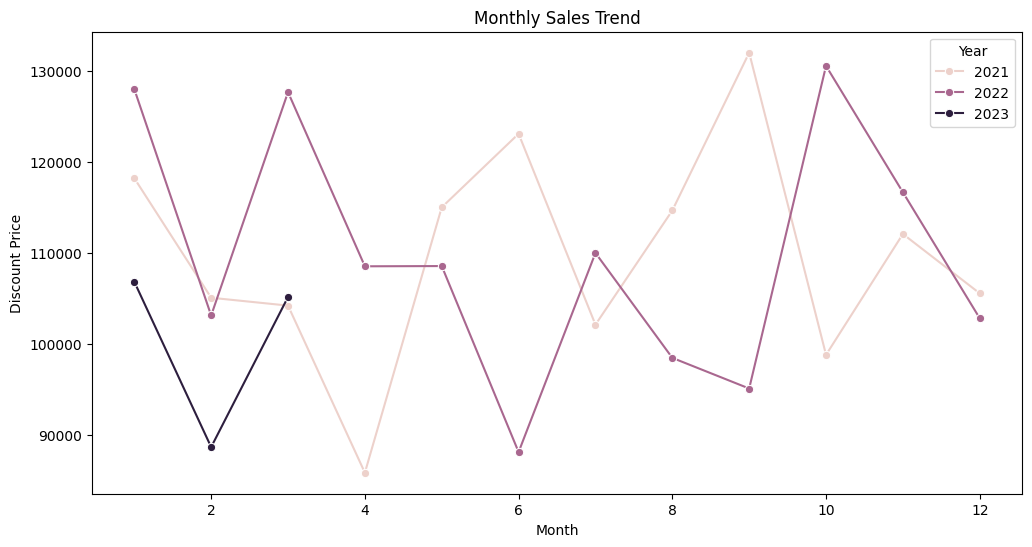

In [11]:
# 1. Sales Trend Over Time
sales_Trend = df.groupby(['Year','Month'])['Discount Price'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_Trend, x='Month', y='Discount Price',hue='Year',marker='o')
plt.title("Monthly Sales Trend")
plt.show()


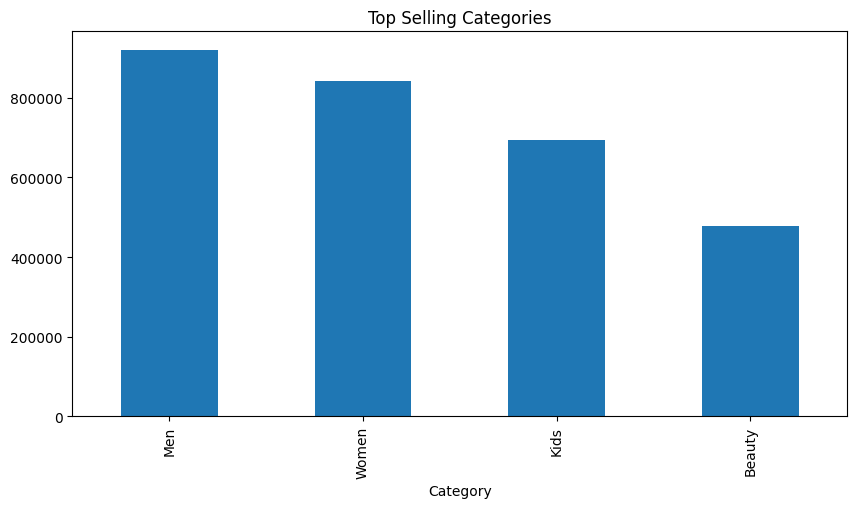

In [18]:
# 2. Top Selling Categories
top_categories = df.groupby("Category")['Discount Price'].sum().sort_values(ascending=False)
top_categories.plot(kind="bar",figsize=(10,5),title="Top Selling Categories")
plt.show()


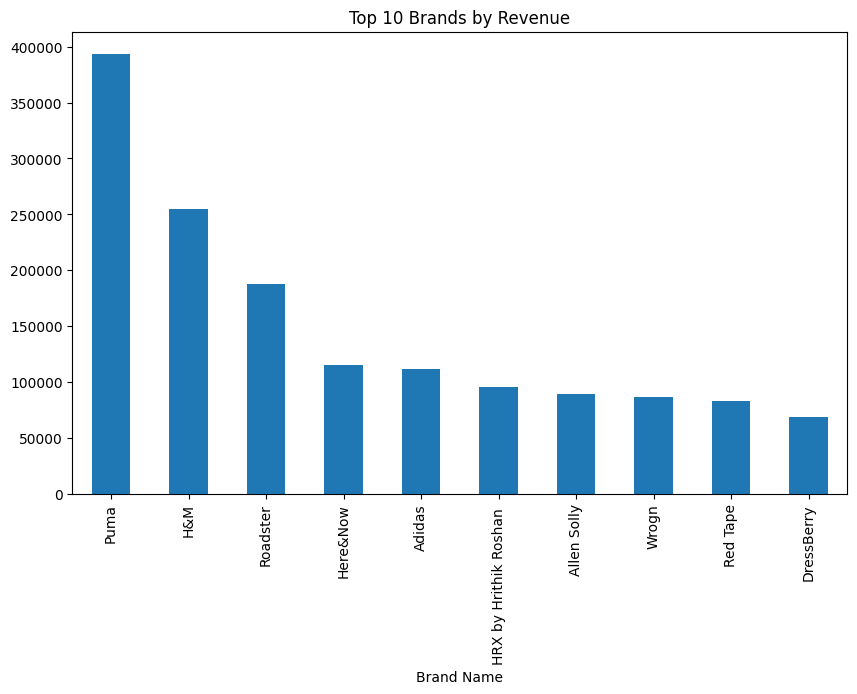

In [25]:
top_brands = df.groupby('Brand Name')["Discount Price"].sum().sort_values(ascending=False).head(10)
top_brands.plot(kind="bar",figsize=(10,6),title="Top 10 Brands by Revenue")
plt.show()

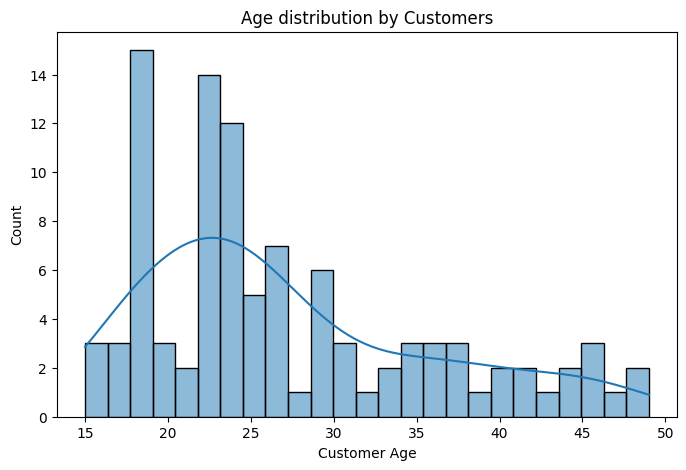

In [29]:
# 4. Customer Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_customers['Customer Age'], bins=25,kde=True)
plt.title("Age distribution by Customers")
plt.show()

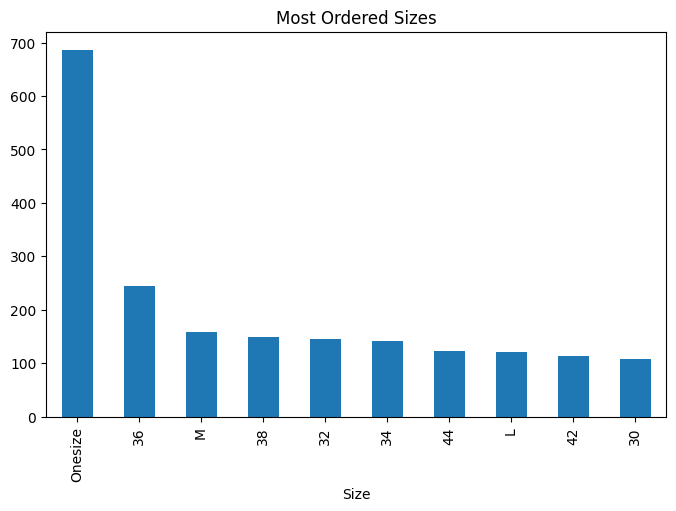

In [32]:
# 5. Most Commonly Ordered Sizes
Top_sizes = df['Size'].value_counts().head(10)
Top_sizes.plot(kind="bar", figsize=(8,5), title="Most Ordered Sizes")
plt.show()

# Step 7: Advanced Analysis
## 1. Customer Segmentation (RFM Analysis)
### Recency: Days since last purchase
### Frequency: Total number of purchases
### Monetary: Total spending

In [35]:
rfm = df.groupby("Customer ID").agg({
    "Date": lambda x: (df["Date"].max() - x.max()).days,
    "Order ID": "count",
    "Discount Price": "sum"
}).rename(columns={"Date": "Recency", "Order ID": "Frequency", "Discount Price": "Monetary"})

rfm.describe()


,Recency,Frequency,Monetary
count,100.000000,100.000000,100.000000
mean,19.240000,35.000000,29351.272843
std,17.653294,0.994937,3466.842373
min,0.000000,34.000000,21991.257100
25%,6.750000,35.000000,27396.500475
50%,14.000000,35.000000,28895.582050
75%,28.250000,35.000000,31035.029475
max,82.000000,42.000000,47262.964600


In [37]:
# 2. Predictive Analysis (Regression to Find Price Impact on Ratings)

from sklearn.linear_model import LinearRegression

df_ratings = df.dropna(subset=["Ratings"])
X = df_ratings[["Discount Price"]]
y = df_ratings["Ratings"]

model = LinearRegression()
model.fit(X, y)
print("Price Impact on Ratings:", model.coef_)


Price Impact on Ratings: [4.12119185e-06]
